In [25]:
import math
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

#### Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

In [11]:
s_mean = 50
s_std = 5
n = 50
confidence_interval = 95/100
alpha = 1 - confidence_interval
standard_error = s_std / math.sqrt(n)
deg_of_free = n - 1
t_val  = stats.t.ppf(1-(alpha/2),deg_of_free)
lower_bound = s_mean - t_val * standard_error
upper_bound = s_mean - t_val * standard_error

print(f'lower_bound = {lower_bound} and upper_bound = {upper_bound}')

lower_bound = 48.579015724388135 and upper_bound = 48.579015724388135


#### Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

In [19]:
observed_freq = np.array([23, 19, 18, 10, 12, 18])
expected_freq = np.array([0.2,0.2,0.2,0.1,0.1,0.2]) * np.sum(observed_freq)
chi_sq,p_val = stats.chisquare(observed_freq,expected_freq)
alpha  = 0.05
print(f'chi_square = {chi_sq},p_value = {p_val}')
if p > alpha :
    print("The distribution of colors in the bag is significantly different from the expected distribution.")
else:
    print("The distribution of colors in the bag is not significantly different from the expected distribution.")

chi_square = 1.3,p_value = 0.9349316790937376
The distribution of colors in the bag is significantly different from the expected distribution.


#### Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data:

|  | Group 1 | Group 2 |
| --- | --- | --- |
| Outcome 1 | 20 | 15 |
| Outcome 2 | 10 | 25 |
| Outcome 3 | 15 | 20 |

##### Interpret the results of the test.

In [20]:
observed = np.array([[20,15],[10,25],[15,20]])
chi_sq,p,dof,expected = stats.chi2_contingency(observed)
alpha = 0.05
print("Chi-square statistic:", chi_sq)
print("p-value:", p)
if p < alpha:
    print("There is a significant association between the groups and the outcomes.")
else:
    print("There is no significant association between the groups and the outcomes.")

Chi-square statistic: 5.833333333333334
p-value: 0.05411376622282158
There is no significant association between the groups and the outcomes.


#### Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

In [52]:
import statsmodels.api as sm
n = 500
successes = 60
p = successes / n
alpha = 0.05
ci = sm.stats.proportion_confint(successes, n, alpha=alpha)
print(f"Sample proportion: {p:.3f}")
print(f"95% confidence interval: {ci}")

Sample proportion: 0.120
95% confidence interval: (0.09151638887130706, 0.14848361112869293)


#### Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

In [22]:
n = 50
s_mean = 75
s_std = 12
alpha = 1 - (90/100)
dof = n - 1
std_error = s_std / math.sqrt(n)
t_val  = stats.t.ppf(1-(alpha/2),dof)

l_bound = s_mean - t_val*std_error
u_bound = s_mean + t_val*std_error
print(l_bound,u_bound)

72.15479878877537 77.84520121122463


#### Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

Text(0.5, 1.0, 'Chi-square distribution with 10 degrees of freedom')

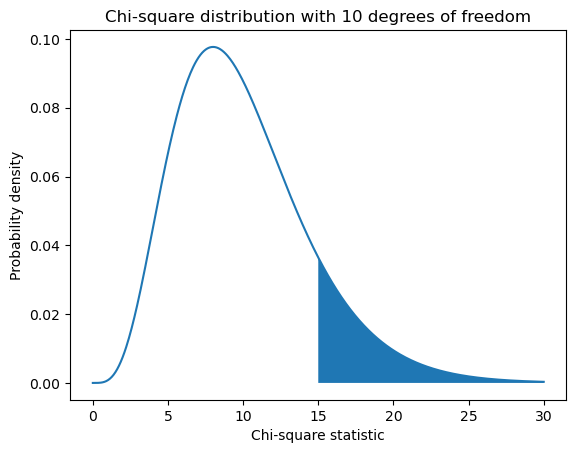

In [43]:
deg_of_freed = 10
x = np.linspace(0,30,500)
chi = stats.chi2.pdf(x,deg_of_freed)
fig,ax = plt.subplots()
ax.plot(x,chi)
x_shade = np.linspace(15,30,100)
y_shade = stats.chi2.pdf(x_shade,deg_of_freed)
ax.fill_between(x_shade,y_shade)
ax.set_xlabel('Chi-square statistic')
ax.set_ylabel('Probability density')
ax.set_title(f'Chi-square distribution with {deg_of_freed} degrees of freedom')

#### Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

To calculate the 99% confidence interval for the true proportion of people in the population who prefer Coke, we can use the formula:

 CI = p̂ ± z*(√(p̂(1-p̂)/n))
 
where
 p̂ is the sample proportion, <br>
 n is the sample size, <br>
 z is the critical value from the standard normal distribution corresponding to the desired confidence level, <br>
 and √ is the square root function.

In this case, the sample size is 1000 and the proportion who preferred Coke is 520/1000 = 0.52. We need to find the critical<br> value z for a 99% confidence interval. We can use the norm.ppf() function from the scipy.stats library to obtain the critical value.<br>
Here's the Python code to calculate the confidence interval:

In [54]:
from scipy.stats import norm
n = 1000
p_hat = 0.52
z = norm.ppf(0.995)
CI_lower = p_hat - z*(math.sqrt(p_hat*(1-p_hat)/n))
CI_upper = p_hat + z*(math.sqrt(p_hat*(1-p_hat)/n))
print("99% Confidence interval: ({:.4f}, {:.4f})".format(CI_lower, CI_upper))

99% Confidence interval: (0.4793, 0.5607)


#### Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

In [46]:
expected = [50,50]
observed = [55,45]
alpha = 0.05
chi,p_val = stats.chisquare(expected,observed)
print(f'chi = {chi},p_value = {p_val}')
if p_val < alpha :
    print('we reject null hypothesis')
else : 
    print('we accept null hypothesis')

chi = 1.0101010101010102,p_value = 0.3148786413364169
we accept null hypothesis


#### Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis.
|  | Lung Cancer:Yes | Lung Cancer:No |
| --- | --- | --- |
| Smoker | 60 | 140 |
| Non Smoker | 30 | 170 |

#### Use a significance level of 0.05.

In [48]:
observed = [[60,140],[30,170]]
alpha = 0.05
chi,p,dof,expected = stats.chi2_contingency(observed)
if p < alpha:
    print("There is a significant association between smoking status and lung cancer diagnosis.")
else:
    print("There is no significant association between smoking status and lung cancer diagnosis.")

There is a significant association between smoking status and lung cancer diagnosis.


#### Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin.

|  | Milk Chocolate | Dark Chocolate | White Chocolate | 
| --- | --- | --- | --- |
| U.s. (n=500)  | 200 | 150 | 150 |
| U.k. (n=500) | 210 | 175 | 100 |

#### Use a significance level of 0.01.

In [50]:
observed = np.array([[200,150,150],[210,175,100]])
alpha = 0.01
chi,p,dof,expected = stats.chi2_contingency(observed)
print(expected)

[[208.12182741 164.97461929 126.9035533 ]
 [201.87817259 160.02538071 123.0964467 ]]


#### Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

In [51]:
import math
from scipy.stats import t

sample_mean = 72
pop_mean = 70
sample_std = 10
sample_size = 30
alpha = 0.05

# Calculate the t-statistic
t_statistic = (sample_mean - pop_mean) / (sample_std / math.sqrt(sample_size))

# Calculate the degrees of freedom
df = sample_size - 1

# Calculate the critical t-value
t_critical = t.ppf(alpha/2, df)

# Calculate the p-value
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))

# Print the results
print("t-statistic:", round(t_statistic, 2))
print("Degrees of freedom:", df)
print("Critical t-value:", round(t_critical, 2))
print("p-value:", p_value)

if abs(t_statistic) > t_critical:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


t-statistic: 1.1
Degrees of freedom: 29
Critical t-value: -2.05
p-value: 0.2823362372860698
Reject the null hypothesis
